In [1]:
import os
import pandas as pd
import pandas.api.types as ptypes
import numpy as np
import seaborn as sb
from matplotlib import pyplot as plt


class SimpleLR:
    
    #class constructor
    def __init__(self):
        self.learning_rate = 0.001
        self.epoch = 10000
        self.theta_0 = 0.5
        self.theta_1 = 1
        
        
     # fuction for display csv file
    def display_data(self):
       
       # Exception handling for file 
        try:
           # for user input file name
           self.file = input("\n Enter file name:-")
           # read csv file
           self.df = pd.read_csv(self.file)

           # for user input file name
           self.file = input("\n Enter file name:-")

           # read csv file
           self.df_1 = pd.read_csv(self.file)
 
       
        # if file not found the error
        except OSError as e:
           # print exception
           print("File not found")
  

    """Handling missing data"""
    def handling_missing_data(self):
       
       # check data type of all variable
        print("\n",self.df.dtypes)
       
       # check for null value
        print("\n\n",self.df.isnull().sum())

       # replacing missing values with mean

        self.df['x'].replace(np.NaN,self.df['x'].mean(), inplace = True)
       
        self.df['y'].replace(np.NaN,self.df['y'].mean(), inplace = True)
       
       # check data type of all variable
        print("\n",self.df_1.dtypes)
       
       # check for null value
        print("\n\n",self.df_1.isnull().sum())

       # replacing missing values with mean

        self.df_1['x'].replace(np.NaN,self.df_1['x'].mean(), inplace = True)
        self.df_1['y'].replace(np.NaN,self.df_1['y'].mean(), inplace = True)
        
    def check_outliers(self):
#         self.df.boxplot()
#         show()     
        sb.boxplot(self.df['x'])
        plt.title("X outliers")
        plt.show()
        sb.boxplot(self.df['y'])
        plt.title("Y outliers ")
        plt.show()
        
    # remove outliers
    
    def remove_outlier(self):
        low = .05
        high = .95
        quant_df = self.df.quantile([low, high])
        for name in list(self.df.columns):
            if ptypes.is_numeric_dtype(self.df[name]):
                self.df = self.df[(self.df[name] > quant_df.loc[low, name]) & (self.df[name] < quant_df.loc[high, name])]
                sb.boxplot(self.df)

       
       
       

          
    """Feature scaling"""  
    def feature_scaling(self):
       # Simple feature scaling
        self.df["x"] = self.df["x"]/self.df["x"].max()
        self.df["y"]= self.df["y"]/self.df["y"].max()
        print("Simple feature scaling")

    def split(self):
        print("Convert pandas datafrem into numpy")
        
        x_train_data = np.array(self.df.x[:len(self.df.x)])   
        y_train_data = np.array(self.df.y[:len(self.df.y)])

        x_test_data = np.array(self.df_1.x[:len(self.df_1.x)])
        y_test_data = np.array(self.df_1.y[:len(self.df_1.y)])
        
       
        return x_train_data, y_train_data, x_test_data, y_test_data
    
    def gradient_descent(self,x_train_data, y_train_data):
        fig = plt.figure()
        fig, (ax1, ax2, ax3,ax4) = plt.subplots(nrows=4, ncols=1, figsize=(5, 20))
        size = len(x_train_data)
        vector = np.ones(size)
        for iteration in range(self.epoch):
            cost = 0 
            hypo_1 = 0
            hypo_2 = 0
            cost_temp = 0
            for row in range(size):
                hypo = ((self.theta_0 * vector[row])  + (self.theta_1 * x_train_data[row]))
                hypo_1 += hypo - y_train_data[row]
                hypo_2 += (hypo - y_train_data[row]) * x_train_data[row]
                cost += hypo - y_train_data[row]
                
            cost_temp +=(hypo - y_train_data[row]) ** 2 
            cost = (1/2 * size)* cost_temp
            self.theta_0 = self.theta_0 -((self.learning_rate/ size) * hypo_1)
            self.theta_1 = self.theta_1 -((self.learning_rate/ size)* hypo_2)
            if(iteration%50 == 0):
                ax1.plot(iteration,self.theta_0,marker='o',color='r')
                ax1.set_title('iteration vs theta 0')
                ax2.plot(iteration,self.theta_1,marker='8',color='g')
                ax2.set_title('iteration vs theta 1')
                ax3.plot(iteration,cost,marker='*',color='b')
                ax3.set_title('iteration vs cost')
                ax4.plot(self.theta_0,self.theta_1,marker = 'x', color='black')
                ax4.set_title('theta_0 vs theta_1')
                if(cost<=0.00009):
                    break
        plt.subplots_adjust(hspace=1)
        plt.show()
        print("iteration = {} and cost function = {}".format(iteration, cost))
        return [self.theta_0,self.theta_1], cost
    
        
       
    def predict (self, x_test_data,theta_0):
        
        n = len(x_test_data)
        y_predict = [None]*n
        vector = np.ones(n)
        for row in range (n):
            y_predict[row] = theta_0[0] * vector[row]  + theta_0[1] * x_test_data[row] 
        return y_predict
    
    def predict_train (self, x_train_data,theta_0):
        
        n = len(x_train_data)
        y_predict_train = [None]*n
        vector = np.ones(n)
        for row in range (n):
            y_predict_train[row] = theta_0[0] * vector[row]  + theta_0[1] * x_train_data[row]
        return y_predict_train
   
     
    def accuracy(self, y_test_data, y_predict):
         
        print("y", y_test_data.shape)
        total_error = 0
        for i in range(0, len(y_test_data)):
            total_error += abs((y_predict[i] - y_test_data[i]) / y_test_data[i])
        total_error = (total_error / len(y_test_data))
        accuracy = 1 - total_error
        return accuracy * 100
    
    def plotgraph(self,x_test_data,y_test_data, y_predict):

        plt.scatter(x_test_data, y_test_data, marker = "x",color='g', label='Test Data Set')
        plt.plot(x_test_data, y_predict, color='r', label='Predicted Values')
        plt.legend()
        plt.show()
        
    def plotgraph_one(self,x_train_data, y_train_data, y_predict):
        plt.scatter(x_train_data, y_train_data, marker = "x",color='g', label='Train Data Set')
        plt.plot(x_train_data, y_predict_train, color='r', label='Predicted Values')
        plt.legend()
    
        plt.show()
    
#     def plotgraph_two(self,theta_0):
#         for i in range(0,10000):
#             plt.plot(i , theta_0[0], color='r', label='theta epoch')
#             plt.legend()

#         plt.show()  
#         plt.close()
    
    
    
obj = SimpleLR()

In [2]:
print("\n----------Show dataset details:----------")
obj.display_data()


----------Show dataset details:----------

 Enter file name:-train.csv

 Enter file name:-test.csv


In [3]:
print("\n----------Handling Missing Data:----------")
obj.handling_missing_data()


----------Handling Missing Data:----------

 x    float64
y    float64
dtype: object


 x    0
y    1
dtype: int64

 x      int64
y    float64
dtype: object


 x    0
y    0
dtype: int64


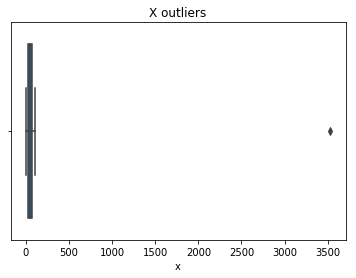

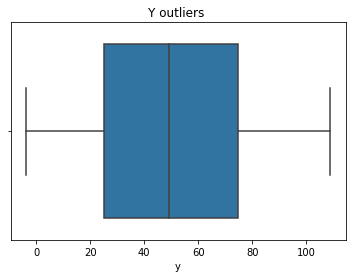

In [4]:
obj.check_outliers()

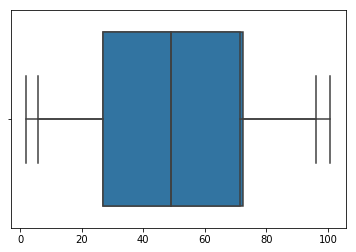

In [5]:
obj.remove_outlier()

In [6]:
obj.feature_scaling()

Simple feature scaling


In [7]:
x_train_data, y_train_data, x_test_data, y_test_data = obj.split()


Convert pandas datafrem into numpy


<Figure size 432x288 with 0 Axes>

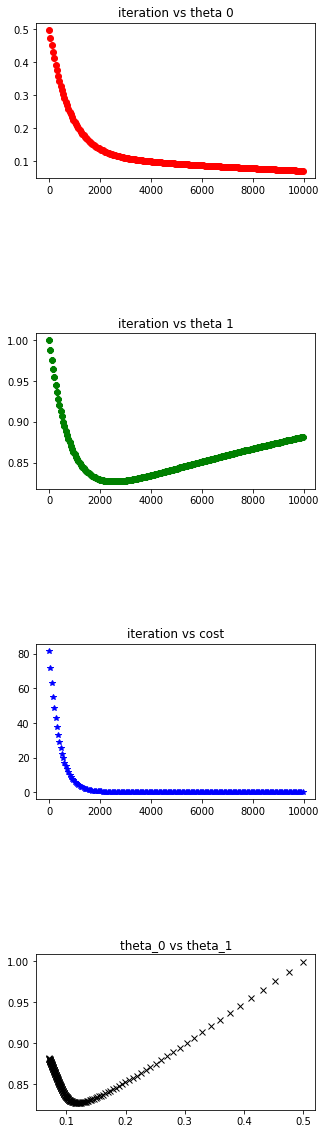

iteration = 9999 and cost function = 0.012497913665640228
[0.07077810202841629, 0.881667578511543]


In [8]:
theta_0,cost = obj.gradient_descent(x_train_data, y_train_data)
print(theta_0)

In [9]:
y_predict = obj.predict (x_test_data,theta_0)
# print("Prediction", y_predict)

In [10]:
y_predict_train = obj.predict_train(x_train_data,theta_0)

In [11]:
acc = obj.accuracy(y_test_data, y_predict)
print("Accuracy", acc)

y (300,)
Accuracy 80.47034340923697


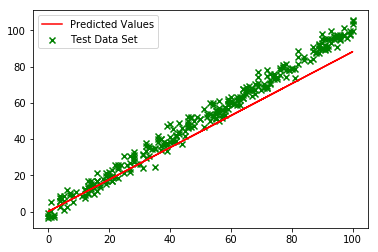

In [12]:
obj.plotgraph(x_test_data,y_test_data, y_predict)

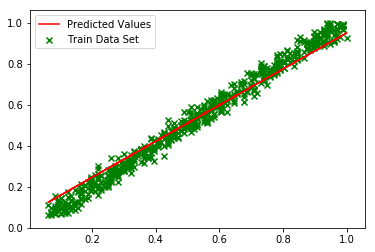

In [13]:
obj.plotgraph_one(x_train_data, y_train_data, y_predict_train)

In [14]:
# obj.plotgraph_two(theta_0)